In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="viridis")
pd.set_option("display.max_columns",50)

DATA_PATH = "../data/rutas_excel/rutas_limpias.csv"
BARRIOS_PATH = "../data/barrios.geojson"

df = pd.read_csv(DATA_PATH)
print(f"dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

dataset cargado: 500 filas, 35 columnas


,route_id,date,weekday,week_number,driver_id,origin_barrio,lat_origin,lon_origin,barrios_recorridos,tipo_vehiculo,vehicle_capacity_m3,volumen_cargado_m3,carga_pct,n_paradas,n_paquetes,cliente_top_count,km_total,desviacion_km,velocidad_media_kmh,duracion_min,tiempo_conduccion_min,tiempo_paradas_min,tiempo_espera_deposito_min,tiempo_carga_min,n_incidentes,motivo_incidente,paquetes_no_entregados,porcentaje_entregas_exitosas,prioridad,entregas_retrasadas,clima,turno,estado_ruta,notas_logisticas,costo_est_operativo
0,2000,2025-01-27,0,4,3,La Plata,-34.922486,-57.952770,La Plata; Tolosa,Furgoneta,8,7.84,98.0,71,81,6,24.6,0.07,17.57,224,84,130,10,16,1,Cliente ausente,1,98.77,media,1,Nublado,mañana,con_incidente,Devolver a depósito,29.01
1,2001,2025-03-25,1,12,1,Abasto,-34.820862,-57.922538,Abasto; Villa Elisa; City Bell,Camioneta,13,4.41,33.9,85,102,7,18.7,0.99,13.68,241,82,159,2,32,0,NaN,0,100.00,alta,0,Despejado,mañana,completa_ok,NaN,30.33
2,2002,2025-01-11,5,1,3,Abasto,-34.817327,-57.916802,Abasto; Lisandro Olmos,Camioneta,13,6.04,46.5,88,101,8,29.4,0.64,19.60,254,90,164,9,34,0,NaN,0,100.00,baja,0,Despejado,mañana,completa_ok,NaN,33.10
3,2003,2025-11-24,0,47,5,Berisso,-34.861056,-57.870459,Berisso; Los Talas; Joaquin Gorina; Gonnet,Camioneta,13,4.84,37.2,83,95,10,33.5,0.00,12.64,278,159,119,9,34,0,NaN,0,100.00,media,0,Despejado,mañana,completa_ok,NaN,35.25
4,2004,2025-02-12,2,6,4,Villa Elvira,-34.893168,-57.955424,Villa Elvira; Villa Montoro,Camioneta,13,6.20,47.7,79,92,9,39.3,1.98,10.96,377,202,108,1,20,1,NaN,2,97.83,media,1,Nublado,mañana,con_incidente,NaN,40.05


In [7]:
print("Tipos de datos:\n", df.dtypes, "\n")
print("Valores nulos por columna:\n", df.isna().sum(), "\n")
print("Duplicados:", df.duplicated().sum())

# Resumen estadístico
df.describe().T


Tipos de datos:
 route_id                                 int64
date                            datetime64[ns]
weekday                                  int64
week_number                              int64
driver_id                                int64
origin_barrio                           object
lat_origin                             float64
lon_origin                             float64
barrios_recorridos                      object
tipo_vehiculo                           object
vehicle_capacity_m3                      int64
volumen_cargado_m3                     float64
carga_pct                              float64
n_paradas                                int64
n_paquetes                               int64
cliente_top_count                        int64
km_total                               float64
desviacion_km                          float64
velocidad_media_kmh                    float64
duracion_min                             int64
tiempo_conduccion_min                    in

,count,mean,min,25%,50%,75%,max,std
route_id,500.0,2249.5,2000.0,2124.75,2249.5,2374.25,2499.0,144.481833
date,500,2025-07-01 10:50:52.800000,2025-01-01 00:00:00,2025-03-28 12:00:00,2025-07-04 00:00:00,2025-09-26 06:00:00,2025-12-31 00:00:00,NaN
weekday,500.0,2.922,0.0,1.0,3.0,5.0,6.0,1.995967
week_number,500.0,25.914,0.0,12.0,26.0,38.0,52.0,15.234131
driver_id,500.0,3.926,1.0,2.0,4.0,6.0,7.0,1.976952
lat_origin,500.0,-34.899252,-34.953134,-34.927274,-34.91719,-34.87169,-34.79461,0.040802
lon_origin,500.0,-57.942763,-57.997043,-57.95957,-57.948234,-57.922951,-57.870181,0.030679
vehicle_capacity_m3,500.0,11.2,8.0,8.0,13.0,13.0,18.0,3.206331
volumen_cargado_m3,500.0,6.4522,2.0,5.28,6.5,7.84,11.81,1.79458
carga_pct,500.0,61.7648,14.2,44.175,59.95,79.275,98.0,22.454622


In [2]:
# Agrupar por barrio y calcular la media del % de entregas exitosas
barrio_stats = df.groupby("origin_barrio")["porcentaje_entregas_exitosas"].mean()

# Identificar el barrio con menor porcentaje promedio
barrio_peor = barrio_stats.idxmin()
porcentaje_peor = barrio_stats.min()

print(f"El barrio con menor porcentaje promedio de entregas exitosas es '{barrio_peor}' con {porcentaje_peor:.2f}% de entregas correctas.")


📉 El barrio con menor porcentaje promedio de entregas exitosas es 'El Carmen' con 98.48% de entregas correctas.


In [4]:
# Agrupar por barrio y calcular la media del % de entregas exitosas
barrio_stats = df.groupby("origin_barrio")["porcentaje_entregas_exitosas"].mean()

# Identificar el barrio con mayor porcentaje promedio
barrio_mejor = barrio_stats.idxmax()
porcentaje_mejor = barrio_stats.max()

print(f"El barrio con mayor porcentaje promedio de entregas exitosas es '{barrio_mejor}' con {porcentaje_mejor:.2f}% de entregas correctas.")


📉 El barrio con mayor porcentaje promedio de entregas exitosas es 'Tolosa' con 99.76% de entregas correctas.


In [5]:
transportista_stats = df.groupby("driver_id")["porcentaje_entregas_exitosas"].mean()

transportista_mejor = transportista_stats.idxmax()
porcentaje_mejor = transportista_stats.max()

print(f"El transportista con mayor porcentaje promedio de entregas exitosas es '{transportista_mejor}' con {porcentaje_mejor:.2f}% de entregas correctas.")


📉 El transportista con mayor porcentaje promedio de entregas exitosas es '7' con 99.80% de entregas correctas.


In [8]:
# Eficiencia de carga
df["eficiencia_carga_pct"] = (df["volumen_cargado_m3"] / df["vehicle_capacity_m3"]) * 100

# Eficiencia de tiempo (tiempo de conducción vs total)
df["eficiencia_tiempo_pct"] = (df["tiempo_conduccion_min"] / df["duracion_min"]) * 100

# Costo por kilómetro
df["costo_por_km"] = df["costo_est_operativo"] / df["km_total"]

# Costo por paquete entregado
df["costo_por_paquete"] = df["costo_est_operativo"] / df["n_paquetes"]

print("✅ Nuevas métricas derivadas creadas.")
df[["eficiencia_carga_pct", "eficiencia_tiempo_pct", "costo_por_km", "costo_por_paquete"]].describe()


✅ Nuevas métricas derivadas creadas.


,eficiencia_carga_pct,eficiencia_tiempo_pct,costo_por_km,costo_por_paquete
count,500.000000,500.000000,500.000000,500.000000
mean,61.763622,36.660308,1.422560,0.350168
std,22.456327,18.782697,0.628337,0.061885
min,14.222222,2.066116,0.645908,0.163301
25%,44.146635,23.116170,1.100176,0.304992
50%,59.913462,37.107700,1.306321,0.347721
75%,79.312500,51.360452,1.589597,0.393009
max,98.000000,81.781377,10.393333,0.556190


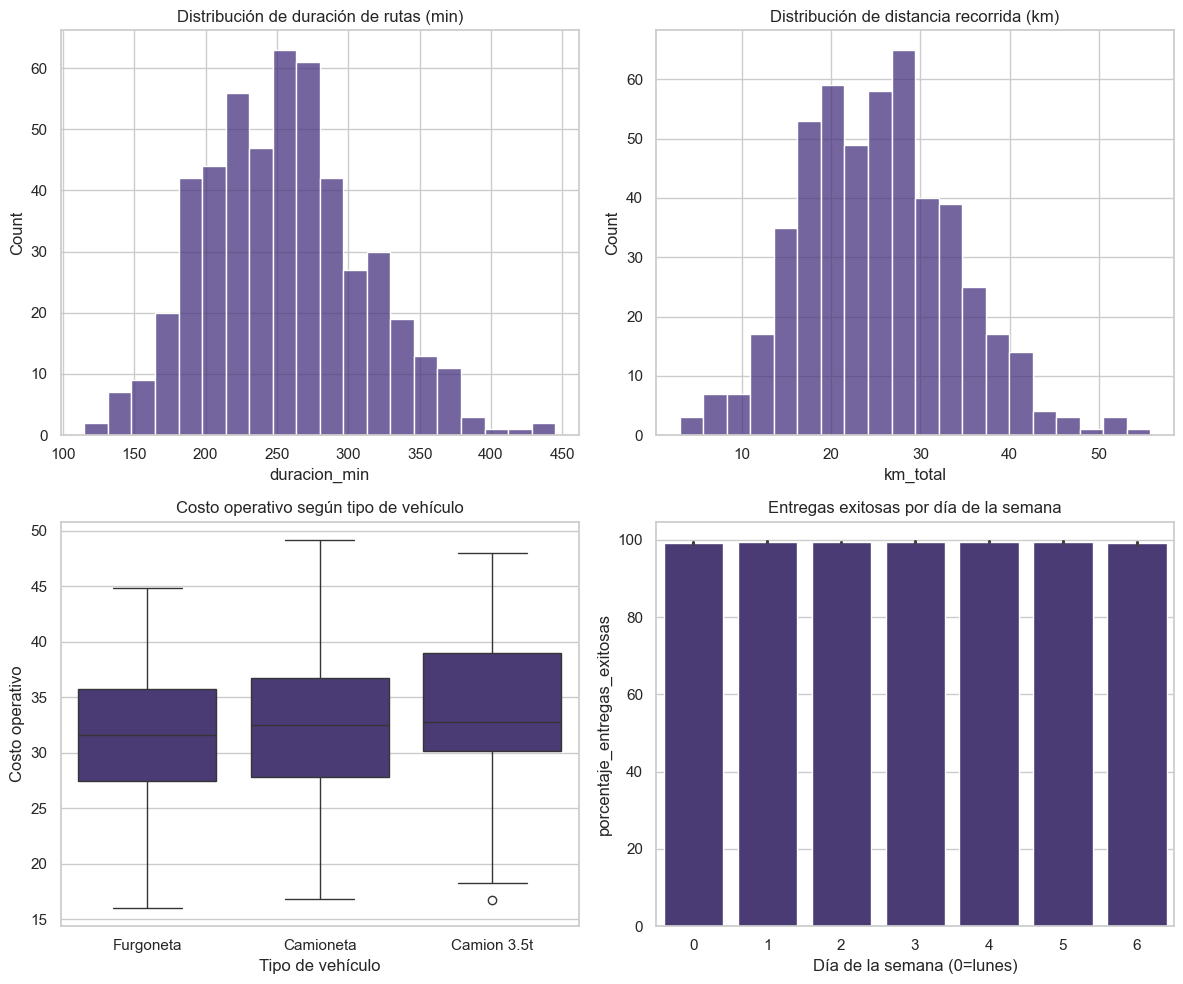

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["duracion_min"], bins=20, ax=axes[0,0])
axes[0,0].set_title("Distribución de duración de rutas (min)")

sns.histplot(df["km_total"], bins=20, ax=axes[0,1])
axes[0,1].set_title("Distribución de distancia recorrida (km)")

sns.boxplot(x="tipo_vehiculo", y="costo_est_operativo", data=df, ax=axes[1,0])
axes[1,0].set_title("Costo operativo según tipo de vehículo")
axes[1,0].set_xlabel("Tipo de vehículo")
axes[1,0].set_ylabel("Costo operativo")

sns.barplot(x="weekday", y="porcentaje_entregas_exitosas", data=df, ax=axes[1,1])
axes[1,1].set_title("Entregas exitosas por día de la semana")
axes[1,1].set_xlabel("Día de la semana (0=lunes)")

plt.tight_layout()
plt.show()


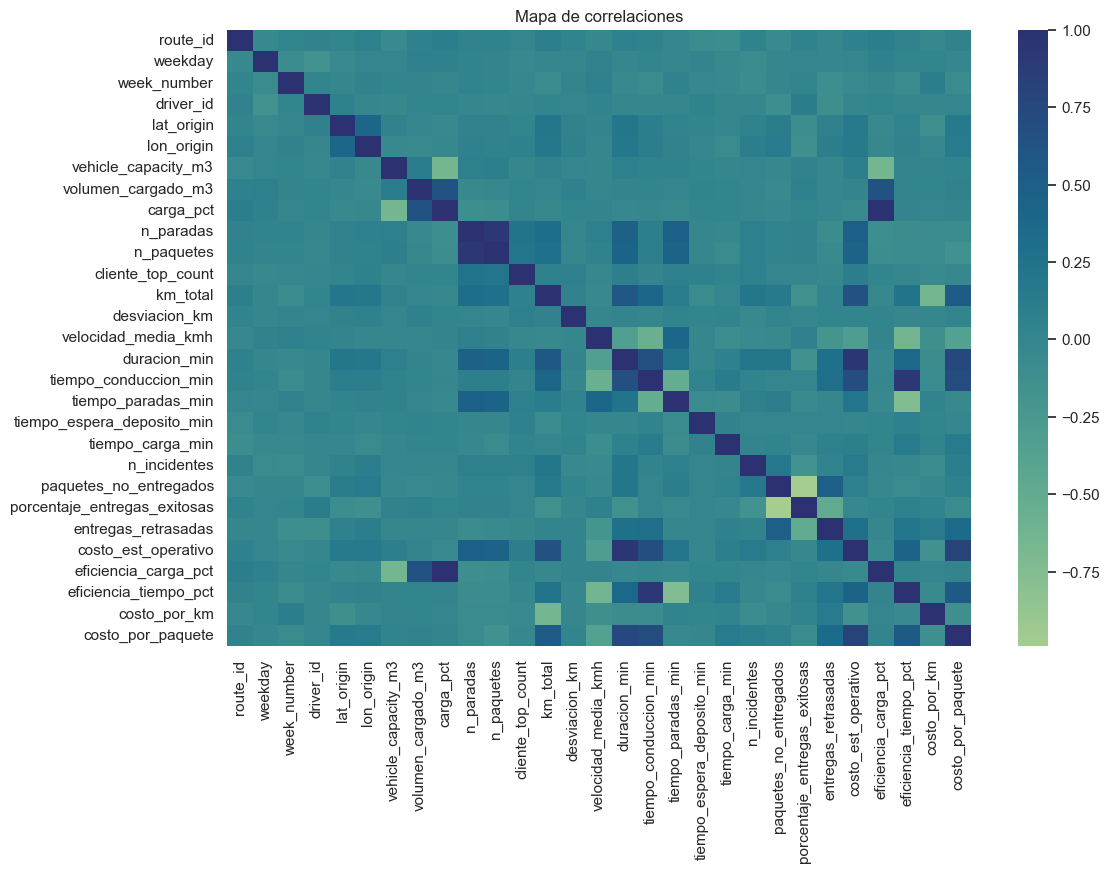

In [10]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="crest", annot=False)
plt.title("Mapa de correlaciones")
plt.show()


In [11]:
anomalias_velocidad = df[(df["velocidad_media_kmh"] < 5) | (df["velocidad_media_kmh"] > 120)]

print("Rutas con velocidad anómala:")
display(anomalias_velocidad[["route_id", "velocidad_media_kmh", "km_total", "duracion_min"]])

# Ejemplo: eficiencia de carga excesiva o nula
anomalias_carga = df[(df["eficiencia_carga_pct"] > 120) | (df["eficiencia_carga_pct"] < 20)]
print("\n Rutas con eficiencia de carga fuera de rango:")
display(anomalias_carga[["route_id", "eficiencia_carga_pct", "vehicle_capacity_m3", "volumen_cargado_m3"]])


🚨 Rutas con velocidad anómala:


,route_id,velocidad_media_kmh,km_total,duracion_min
11,2011,249.60,20.8,229
38,2038,229.20,19.1,186
46,2046,246.86,28.8,192
52,2052,325.20,27.1,207
53,2053,4.21,9.0,247
68,2068,180.00,15.0,148
72,2072,131.25,17.5,227
110,2110,231.00,23.1,219
114,2114,243.60,20.3,169
115,2115,403.20,33.6,219



🚨 Rutas con eficiencia de carga fuera de rango:


,route_id,eficiencia_carga_pct,vehicle_capacity_m3,volumen_cargado_m3
54,2054,18.307692,13,2.38
115,2115,15.461538,13,2.01
202,2202,18.923077,13,2.46
209,2209,14.222222,18,2.56
300,2300,15.888889,18,2.86
416,2416,17.111111,18,3.08
478,2478,15.384615,13,2.00


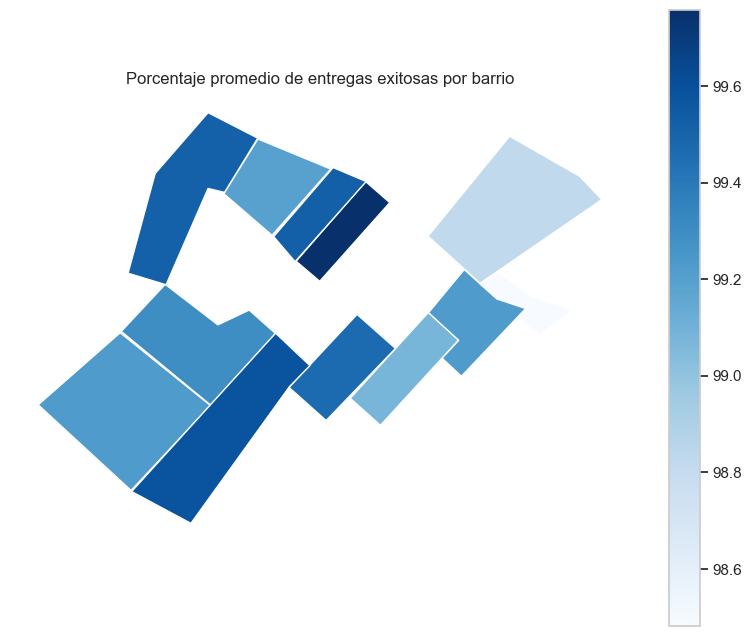

In [12]:
barrios_gdf = gpd.read_file("../data/barrios.geojson")

# Calcular entregas promedio por barrio origen
entregas_por_barrio = df.groupby("origin_barrio")["porcentaje_entregas_exitosas"].mean().reset_index()

# Unir con el geojson
barrios_gdf = barrios_gdf.merge(entregas_por_barrio, how="left", left_on="barrio", right_on="origin_barrio")

# Graficar
barrios_gdf.plot(column="porcentaje_entregas_exitosas", cmap="Blues", legend=True, figsize=(10,8))
plt.title("Porcentaje promedio de entregas exitosas por barrio")
plt.axis("off")
plt.show()


In [13]:
output_path = "../data/rutas_excel/rutas_analisis_final.csv"
df.to_csv(output_path, index=False)
print(f" Dataset enriquecido exportado exitosamente a: {output_path}")


✅ Dataset enriquecido exportado exitosamente a: ../data/rutas_excel/rutas_analisis_final.csv


In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
